In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('happiness_data.csv')
data.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [9]:
data.shape

(1949, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [7]:
data.describe()


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [11]:
data.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [15]:
categorical = data.select_dtypes(include=['object']).columns
continuous = data.select_dtypes(include=['float64', 'int64']).columns
print("Continuous features are - ",continuous)
print("categorical features are - ",categorical)

Continuous features are -  Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')
categorical features are -  Index(['Country name'], dtype='object')


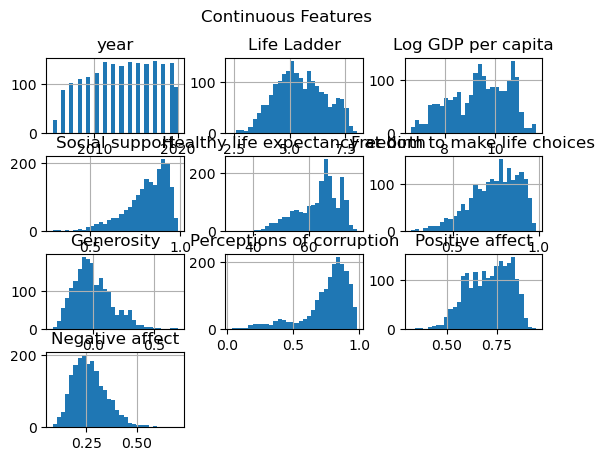

In [39]:
data[continuous].hist(bins=30)
plt.suptitle("Continuous Features")
plt.show()

In [49]:
missing_val=data.isna().sum()
print("Missing values \n",missing_val)

Missing values 
 Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


In [59]:
correlation=data[continuous].corr()
print(correlation)

                                      year  Life Ladder  Log GDP per capita  \
year                              1.000000     0.035515            0.078246   
Life Ladder                       0.035515     1.000000            0.790166   
Log GDP per capita                0.078246     0.790166            1.000000   
Social support                   -0.010093     0.707806            0.692602   
Healthy life expectancy at birth  0.164059     0.744506            0.848049   
Freedom to make life choices      0.222151     0.528063            0.367932   
Generosity                       -0.043422     0.190632           -0.000915   
Perceptions of corruption        -0.081478    -0.427245           -0.345511   
Positive affect                  -0.003245     0.532273            0.302282   
Negative affect                   0.196869    -0.297488           -0.210781   

                                  Social support  \
year                                   -0.010093   
Life Ladder               

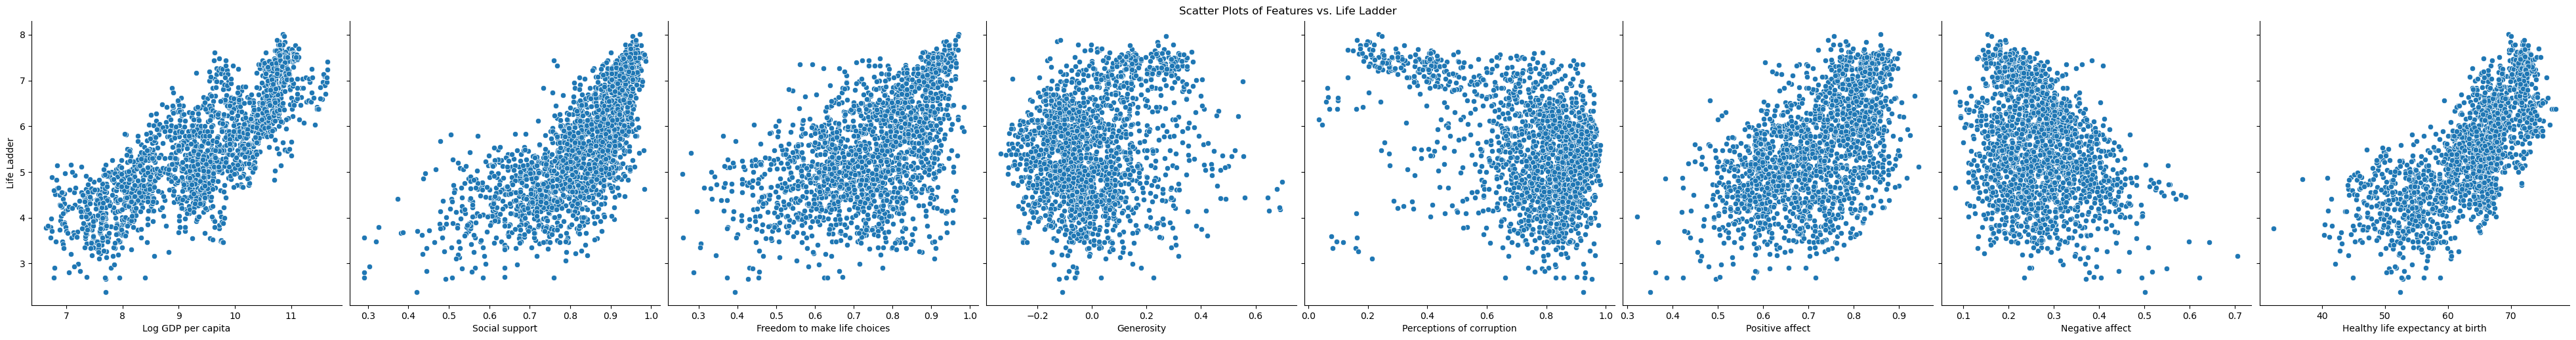

In [85]:
sns.pairplot(data, x_vars=['Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 
                           'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Healthy life expectancy at birth'], 
             y_vars='Life Ladder', height=5)
plt.suptitle('Scatter Plots of Features vs. Life Ladder', y=1.02)
plt.show()

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [91]:
trainingdata,testingdata=train_test_split(data, test_size=0.25, random_state=42)

In [93]:
trainingdata.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1461.000000,1461.000000,1436.000000,1453.000000,1424.000000,1443.000000,1395.000000,1380.000000,1445.000000,1449.000000
mean,2013.137577,5.457548,9.358944,0.812285,63.287343,0.740450,-0.000131,0.746502,0.708021,0.267628
std,4.199914,1.117221,1.166775,0.118882,7.524471,0.143169,0.163348,0.188704,0.107348,0.084529
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.639000,8.452250,0.753000,58.200000,0.645000,-0.116000,0.690000,0.623000,0.206000
50%,2013.000000,5.346000,9.448500,0.834000,65.142500,0.760000,-0.024000,0.804000,0.720000,0.258000
75%,2017.000000,6.269000,10.343250,0.905000,68.570000,0.854500,0.089000,0.874000,0.797000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [95]:
testingdata.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,488.000000,488.000000,477.000000,483.000000,470.000000,474.000000,465.000000,459.000000,482.000000,484.000000
mean,2013.450820,5.494121,9.397080,0.813356,63.577611,0.748975,0.000806,0.748998,0.715946,0.271287
std,4.061342,1.111866,1.115716,0.117387,7.470715,0.138716,0.158939,0.181099,0.106243,0.087083
min,2005.000000,2.694000,6.723000,0.326000,40.808000,0.258000,-0.303000,0.078000,0.369000,0.103000
25%,2010.000000,4.677000,8.523000,0.744000,59.655000,0.661250,-0.107000,0.693000,0.629250,0.206750
50%,2014.000000,5.467000,9.518000,0.837000,65.290000,0.770000,-0.030000,0.800000,0.731000,0.259500
75%,2017.000000,6.342000,10.376000,0.904500,68.575000,0.860750,0.096000,0.868000,0.808000,0.319500
max,2020.000000,7.858000,11.520000,0.975000,75.000000,0.980000,0.650000,0.983000,0.934000,0.643000


In [101]:
Xtrain = trainingdata[['Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 
                      'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Healthy life expectancy at birth']]
ytrain = trainingdata['Life Ladder']

Xtest = trainingdata[['Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 
                    'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Healthy life expectancy at birth']]
ytest = trainingdata['Life Ladder']